## Tensorflow - Diabetes Training Model


### Save and Load model in Tensorflow

When we build a neural network model, we would like to save the model and share it with other. Instead of using `pickle` package, tensorflow has its own save/load api. The following example is a demo showing how to save and load a trained model.


In [2]:
# Load the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
from sklearn.model_selection import train_test_split

# load dataset
dataset = np.loadtxt("Diabetes_No_Header.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:, 0:8]
Y = dataset[:, 8]
X_train, X_Test, Y_train, Y_Test = train_test_split(X, Y, test_size=77, random_state=7)


Using TensorFlow backend.


In [13]:
# create model
model = Sequential()
model.add(Dense(20, activation='relu', input_dim=8)) #Note that you can add more hidden layers here
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
#Change the optimizer to sgd and see what happens
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

# Fit the model
history = model.fit(X_train, Y_train, epochs=100, batch_size=10, validation_split=0.1, verbose=0)

print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


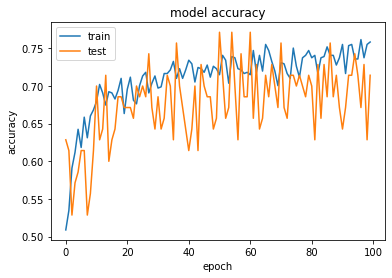

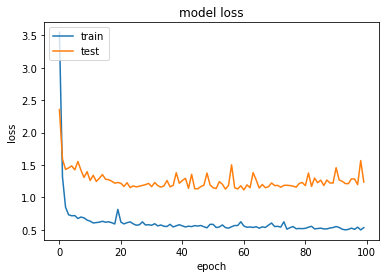

In [14]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend([ 'train', 'test' ], loc='upper left')
plt.show()


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Optimization in TensorFlow
Optimize weights given a loss. See [documentation](https://www.tensorflow.org/versions/r0.12/api_docs/python/contrib.layers/optimization). The following example compare four algorithm to train the neural networks with same structures.
- [SGD](https://www.tensorflow.org/api_docs/python/tf/train/GradientDescentOptimizer)
- [Momentum](https://www.tensorflow.org/versions/r1.0/api_docs/python/tf/train/MomentumOptimizer)
- [RMSProp](https://www.tensorflow.org/api_docs/python/tf/train/RMSPropOptimizer)
- [Adam](https://www.tensorflow.org/api_docs/python/tf/train/AdamOptimizer)

In [16]:
# evaluate the model
scores = model.evaluate(X_Test, Y_Test, verbose=1)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))

# serialize model to JSON
model_json = model.to_json()
with open("my_model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("my_model.h5")
print("Saved model to disk")

77/77 [==============================] - 0s 39us/step
accuracy: 88.31%


In [ ]:
# load json and create model
json_file = open('my_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

loaded_model = model_from_json(loaded_model_json)
# load weights into new model

loaded_model.load_weights("my_model.h5")
print("Finish Loading the model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X_Test, Y_Test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

# Try this code in spyder, clear the workspce at first.


In [17]:
#change the optimizer to sgd and repeat the above 
#hint:
from keras.optimizers import SGD

sgd = SGD(lr=0.1, momentum=0.7) #change momentum and lr and see how it goes
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train, epochs=150, batch_size=20, validation_split=0.1, verbose=0)

# evaluate the model
scores = model.evaluate(X_Test, Y_Test, verbose=1)

print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))